In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
np.random.seed(42)
data_size = 300
study_hours = np.random.randint(1, 10, data_size)
mock_score = np.random.randint(30, 100, data_size)
internship = np.random.choice([0,1], data_size)
place = ((study_hours > 5).astype(int)+
        (mock_score > 65).astype(int)+
        internship) >= 2
df = pd.DataFrame({"study_hours" : study_hours,
                   "mock_score" : mock_score,
                   "internship" : internship,
                   "placed": place.astype(int)})
df.head()

,study_hours,mock_score,internship,placed
0,7,46,0,0
1,4,62,0,0
2,8,38,0,0
3,5,72,1,1
4,7,77,1,1


In [5]:
X = df.drop("placed", axis = 1)
y = df["placed"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
svm_model = SVC(kernel = 'rbf',
               C = 1.5,
               gamma = 'scale',
               probability = True)
svm_model.fit(X_train_scaled, y_train)

,C,1.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification report: \n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667

Confusion matrix: 
 [[33  1]
 [ 1 25]]

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.96      0.96      0.96        26

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



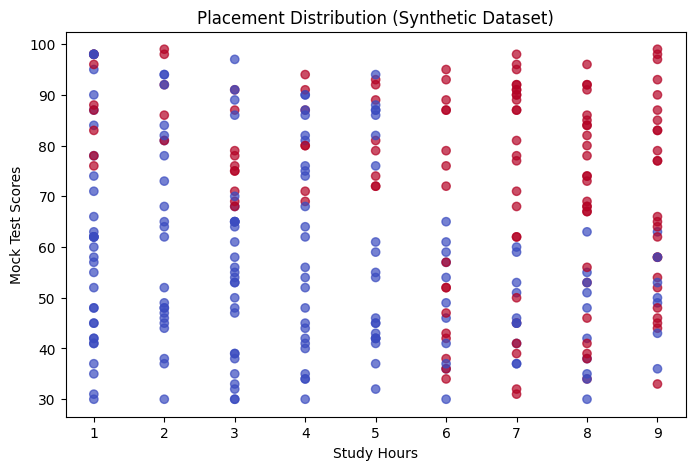

In [10]:
plt.figure(figsize = (8,5))
plt.scatter(X["study_hours"],
           X["mock_score"],
           c = y,
           cmap = "coolwarm",
           alpha = 0.7)
plt.xlabel("Study Hours")
plt.ylabel("Mock Test Scores")
plt.title("Placement Distribution (Synthetic Dataset)")
plt.show()

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select only 2 features
X_2d = df[["Study_Hours", "Mock_Score"]]
y = df["Placed"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Train SVM
svm_model = SVC(kernel="linear", C=1)
svm_model.fit(X_scaled, y)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Decision regions
plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")

# Data points
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="k"
)

# Hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

x_plot = np.linspace(x_min, x_max, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Margins
margin = 1 / np.sqrt(np.sum(w ** 2))
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin

plt.plot(x_plot, y_plot, 'k-', label="Hyperplane")
plt.plot(x_plot, y_margin_up, 'k--', label="Margin")
plt.plot(x_plot, y_margin_down, 'k--')

plt.xlabel("Study Hours (Scaled)")
plt.ylabel("Mock Score (Scaled)")
plt.title("SVM Hyperplane Visualization")
plt.legend()
plt.show()

KeyError: "None of [Index(['Study_Hours', 'Mock_Score'], dtype='object')] are in the [columns]"